## initial

In [1]:
%cd C:\Users\itaye\Desktop\pdexplain\pd-explain\src

C:\Users\itaye\Desktop\pdexplain\pd-explain\src


C:\Users\itaye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
import pd_explain

C:\Users\itaye\AppData\Local\Temp\ipykernel_13184\2046952530.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


usetex-False


In [3]:
spotify_all = (pd.read_csv(r"C:\Users\itaye\Desktop\pdexplain\pd-explain\Examples\Datasets\spotify_all.csv"))
# spotify_all = (pd.read_csv(r"C:\Users\User\Desktop\pd_explain_test\pd-explain\Examples\Datasets\spotify_all.csv"))

## example 1

In [4]:
spotify_filtered = spotify_all[(spotify_all.loudness <= -28) & (spotify_all['decade'] <= 2000)]

<Axes: title={'center': "Attribute 'loudness' is skewed\nin dataframe 'spotify_all'"}, xlabel='loudness bins', ylabel='num_of_records'>

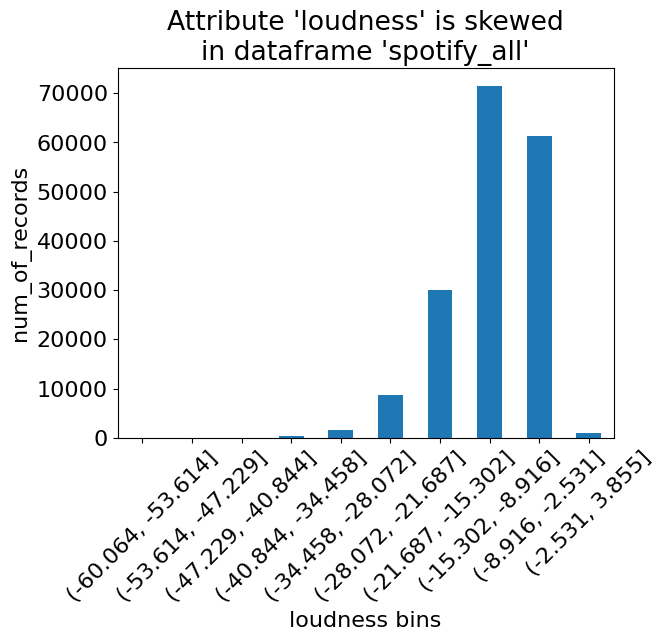

In [5]:
pd.cut(spotify_all.loudness, 10).value_counts().sort_index().plot(kind="bar",
                                                                  xlabel='loudness bins', ylabel='num_of_records', rot=45
                                                                  , title='Attribute \'loudness\' is skewed\nin dataframe \'spotify_all\'')

C:\Users/itaye/Desktop/pdexplain/FEDEx_Generator-1/src\fedex_generator\Operations\Filter.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[column] = numeric_df[column].map(items_map)
C:\Users/itaye/Desktop/pdexplain/FEDEx_Generator-1/src\fedex_generator\Operations\Filter.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[column] = numeric_df[column].map(items_map)
C:\Users/itaye/Desktop/pdexplain/FEDEx_Generator-1/src\fedex_generator\Operations\Filter.py:52: SettingWithCopyWarning

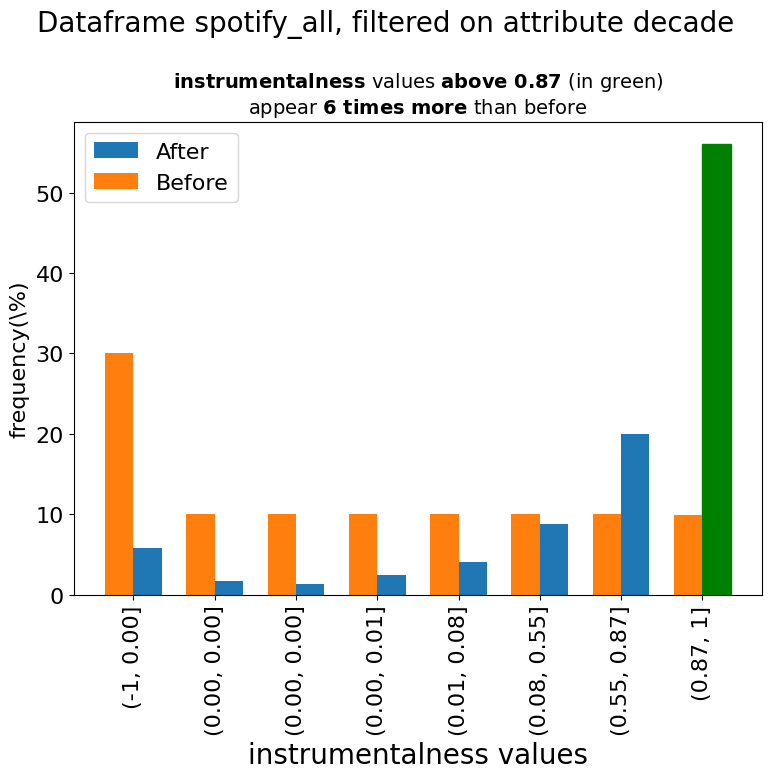

In [6]:
spotify_filtered.explain(attributes=['instrumentalness'])

<Axes: xlabel='decade'>

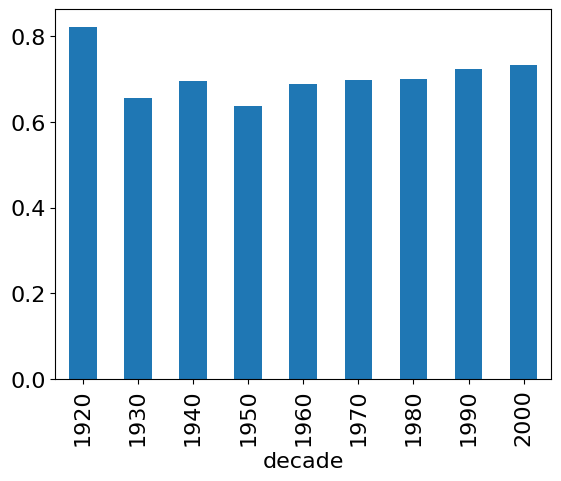

In [7]:
spotify_filtered_grouped = spotify_filtered.groupby(['decade']).instrumentalness.mean()
spotify_filtered_grouped.plot(kind='bar')

In [10]:
spotify_filtered['duration_minutes'].describe()

count    1864.000000
mean        3.688260
std         3.429342
min         0.085133
25%         1.943204
50%         3.049217
75%         4.563783
max        60.846667
Name: duration_minutes, dtype: float64

'The predicate\nyear between (1946.7, 1955.6), \nduration_minutes between (0.02, 6.16), \nhas high influence on this outlier.'

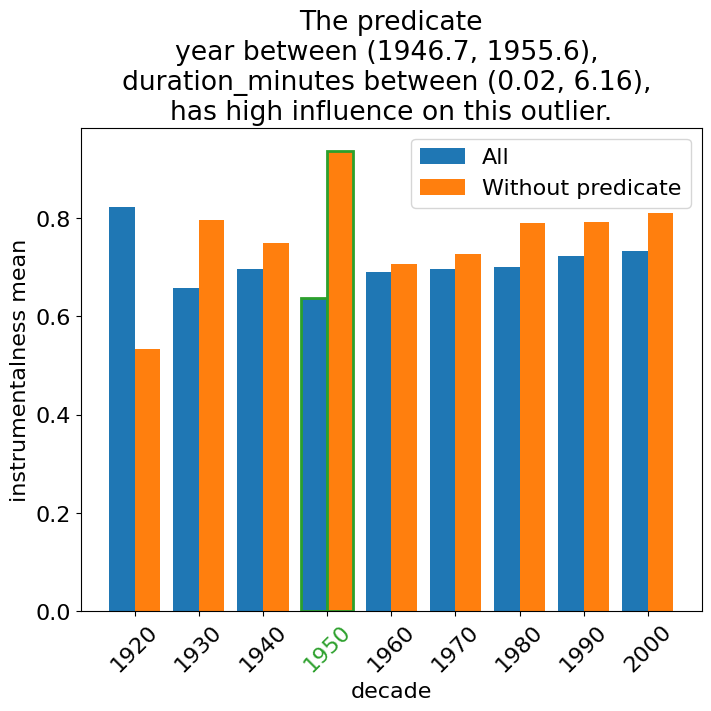

In [8]:
spotify_filtered_grouped.explain(explainer='outlier',target=1950, dir=-1)

In [10]:
popular = spotify_all[spotify_all.popularity > 65]
popular_decades = popular['decade'].value_counts().sort_index()
popular_decades = popular_decades/popular_decades.sum()

## example 2

In [4]:
new_songs = spotify_all[spotify_all['decade']>1970]
new_songs['explicit'].value_counts()[1]

9263

sequence item 0: expected str instance, Series found


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,popularity_score,main_artist,duration_minutes
decade,,,,,,,,,,,,,,,,,,,,
1980,20074,20074,20074,20074,20074,20074,20074,20074,20074,20074,20074,20074,20074,20074,20074,20074,20074,20074,20074,20074
1990,20328,20328,20328,20328,20328,20328,20328,20328,20328,20328,20328,20328,20328,20328,20328,20328,20328,20328,20328,20328
2000,13782,13782,13782,13782,13782,13782,13782,13782,13782,13782,13782,13782,13782,13782,13782,13782,13782,13782,13782,13782
2010,22455,22455,22455,22455,22455,22455,22455,22455,22455,22455,22455,22455,22455,22455,22455,22455,22455,22455,22455,22455
2020,6134,6134,6134,6134,6134,6134,6134,6134,6134,6134,6134,6134,6134,6134,6134,6134,6134,6134,6134,6134


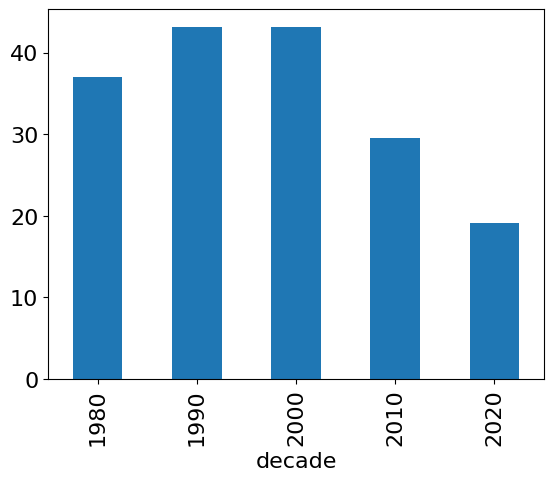

In [5]:
new_songs = spotify_all[spotify_all['decade']>1970]
grouped3 = new_songs.groupby(['decade'])
grouped3_mean_by_popularity = grouped3['popularity'].agg('mean')
grouped3_mean_by_popularity.plot(kind='bar')
grouped3.count()

In [6]:
new_songs_non_explicit = new_songs[new_songs['explicit']==0]
new_songs_explicit = new_songs[new_songs['explicit']==1]
grouped4 = new_songs_non_explicit.groupby(['decade'])
grouped4_mean_by_popularity = grouped4['popularity'].agg('mean')
# grouped4_mean_by_popularity.plot(kind='bar')
grouped4.count()

sequence item 0: expected str instance, Series found


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,popularity_score,main_artist,duration_minutes
decade,,,,,,,,,,,,,,,,,,,,
1980,19612,19612,19612,19612,19612,19612,19612,19612,19612,19612,19612,19612,19612,19612,19612,19612,19612,19612,19612,19612
1990,18037,18037,18037,18037,18037,18037,18037,18037,18037,18037,18037,18037,18037,18037,18037,18037,18037,18037,18037,18037
2000,12032,12032,12032,12032,12032,12032,12032,12032,12032,12032,12032,12032,12032,12032,12032,12032,12032,12032,12032,12032
2010,18645,18645,18645,18645,18645,18645,18645,18645,18645,18645,18645,18645,18645,18645,18645,18645,18645,18645,18645,18645
2020,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184


In [7]:
new_songs_explicit = new_songs[new_songs['explicit']==1]
grouped5 = new_songs_explicit.groupby(['decade'])
grouped5_mean_by_popularity = grouped5['popularity'].agg('mean')
# grouped4_mean_by_popularity.plot(kind='bar')
grouped5.count()

sequence item 0: expected str instance, Series found


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,popularity_score,main_artist,duration_minutes
decade,,,,,,,,,,,,,,,,,,,,
1980,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462
1990,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291
2000,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750,1750
2010,3810,3810,3810,3810,3810,3810,3810,3810,3810,3810,3810,3810,3810,3810,3810,3810,3810,3810,3810,3810
2020,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950


C:\Users/itaye/Desktop/pdexplain/FEDEx_Generator-1/src\fedex_generator\Measures\OutlierMeasure2.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  if inf/final_inf>1.1:


The predicate
explicit is 0, 
popularity_score is 0, 
has high influence on this outlier.


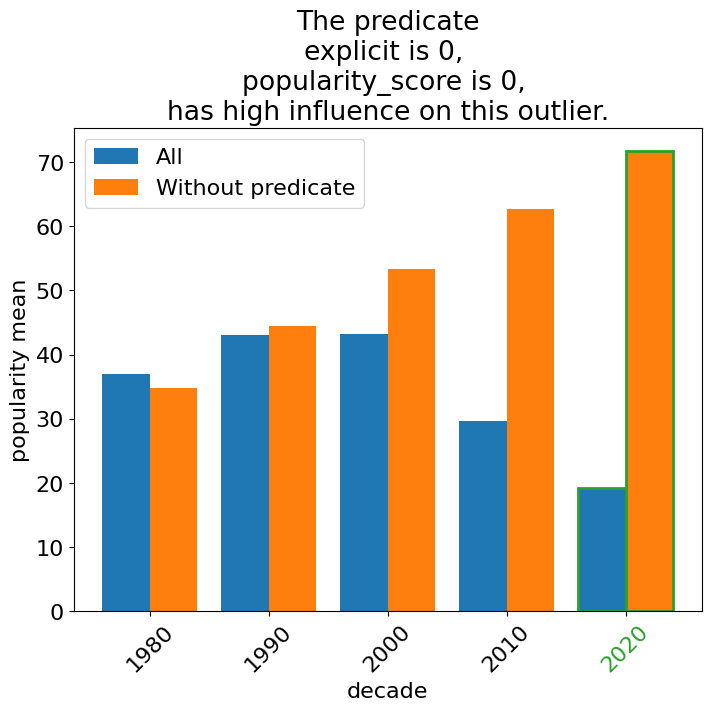

In [8]:
print(grouped3_mean_by_popularity.explain(explainer='outlier', target=2020, dir=-1))

<Axes: xlabel='decade'>

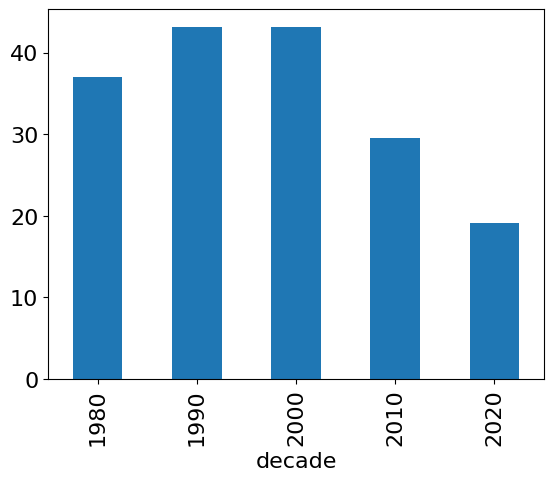

In [ ]:
new_songs = spotify_all[(spotify_all['decade']>1970) & ((spotify_all['instrumentalness']>0) | (spotify_all['instrumentalness']<0.2))]
grouped3 = new_songs.groupby(['decade'])
grouped3_mean_by_popularity = grouped3['popularity'].agg('mean')
grouped3_mean_by_popularity.plot(kind='bar')

<Axes: title={'center': "Decades probability distribution shows an outlier                     \n when the data is filtered by 'popularity'>65"}, xlabel='decade', ylabel='probability'>

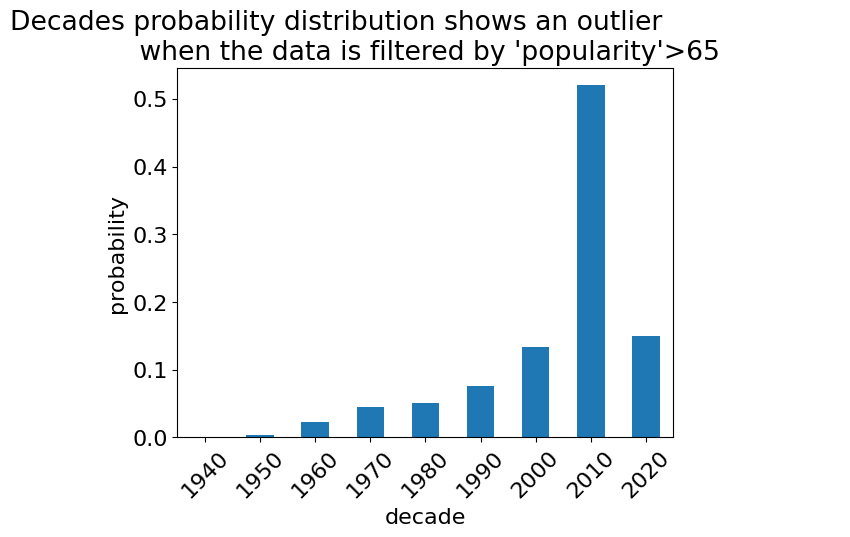

In [ ]:
popular_decades.plot(kind='bar', ylabel='probability', title="Decades probability distribution shows an outlier\
                     \n when the data is filtered by \'popularity\'>65", rot=45)

C:\Users/itaye/Desktop/pdexplain/FEDEx_Generator-1/src\fedex_generator\Operations\Filter.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[column] = numeric_df[column].map(items_map)
C:\Users/itaye/Desktop/pdexplain/FEDEx_Generator-1/src\fedex_generator\Operations\Filter.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[column] = numeric_df[column].map(items_map)
C:\Users/itaye/Desktop/pdexplain/FEDEx_Generator-1/src\fedex_generator\Operations\Filter.py:52: SettingWithCopyWarning

replace to $$


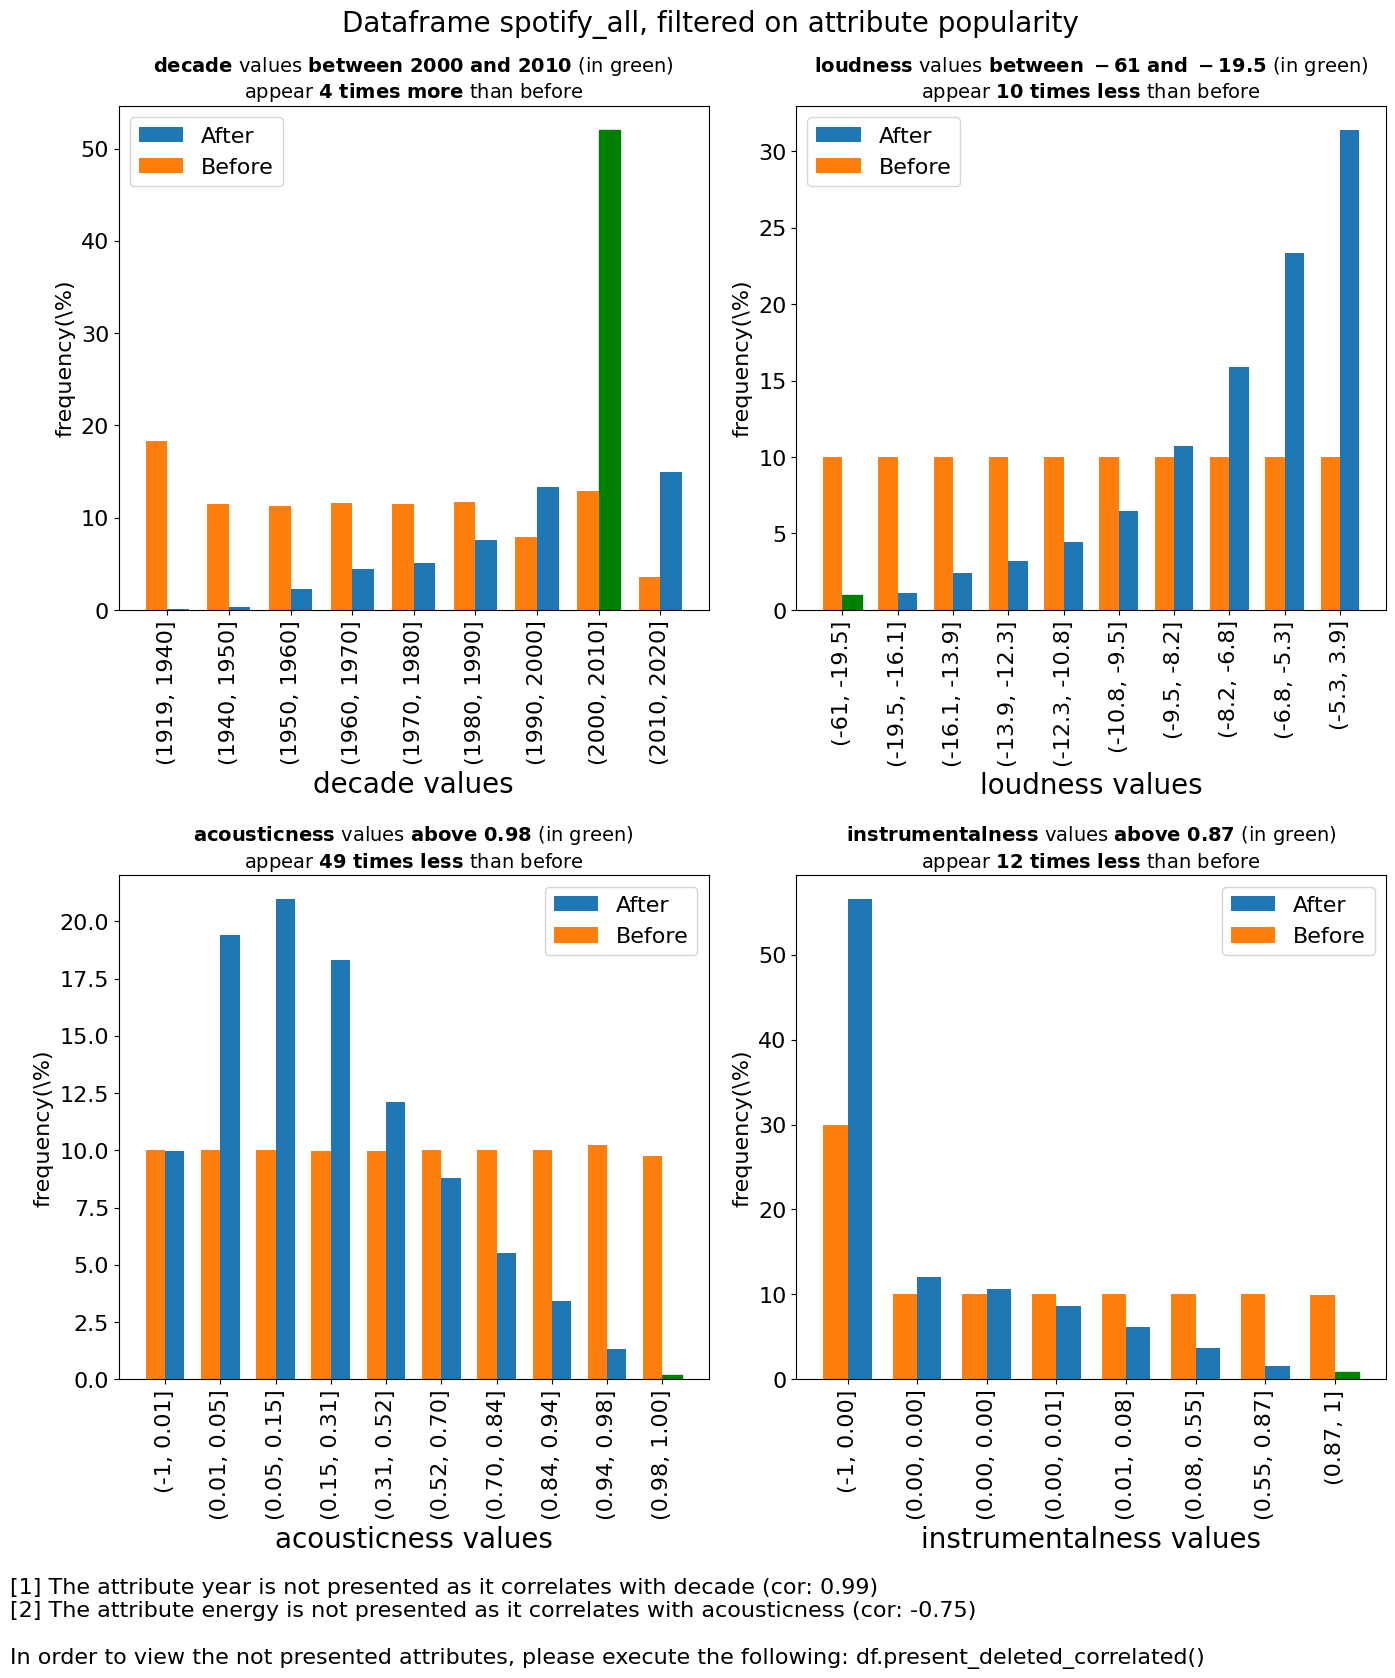

In [ ]:
popular.explain(top_k=4)
# type(popular)

replace to $$


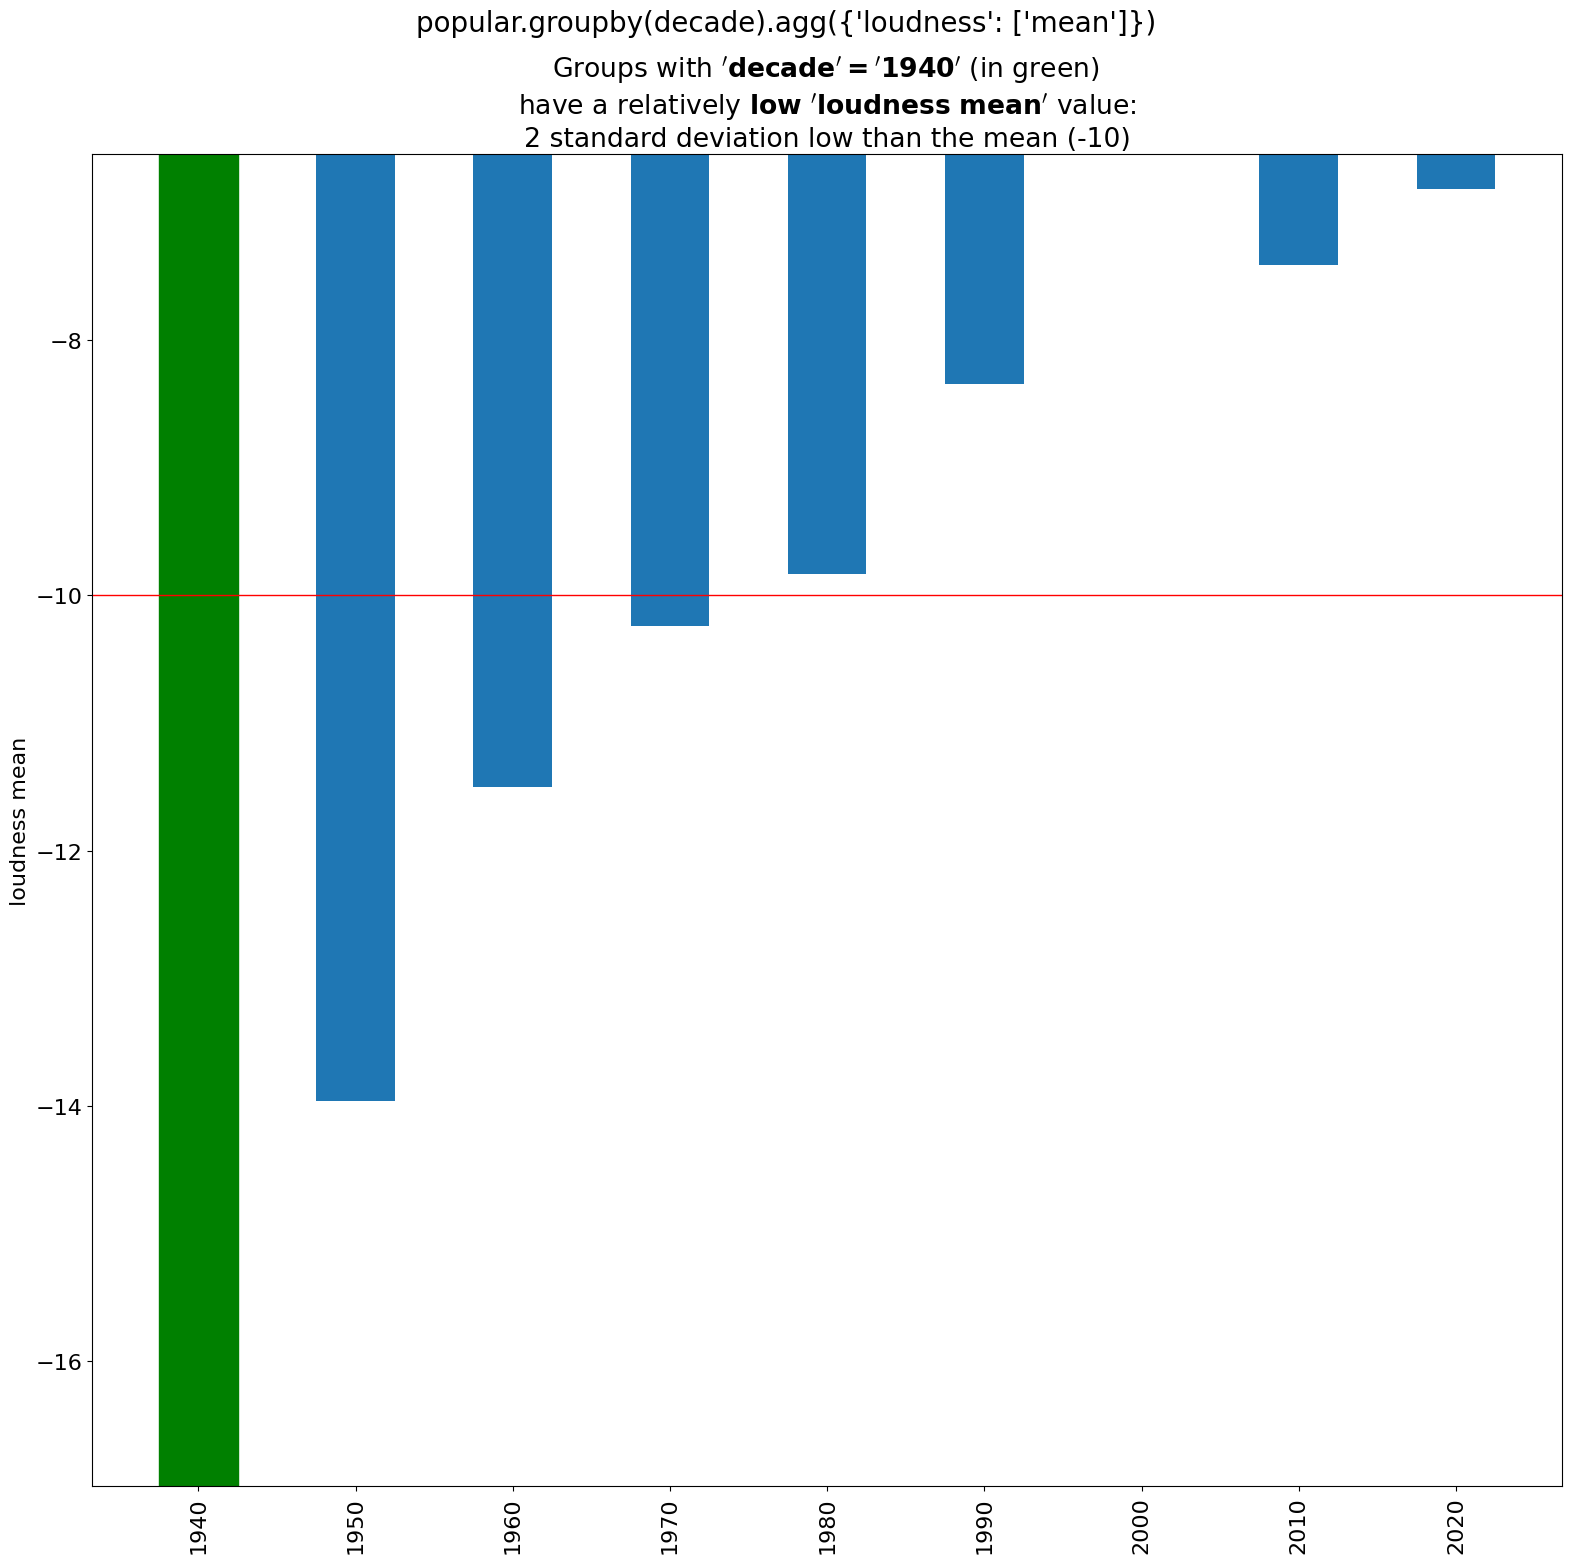

In [ ]:
popular_mean_by_decade = popular.groupby('decade').loudness.mean()
popular_mean_by_decade.explain()

replace to $$


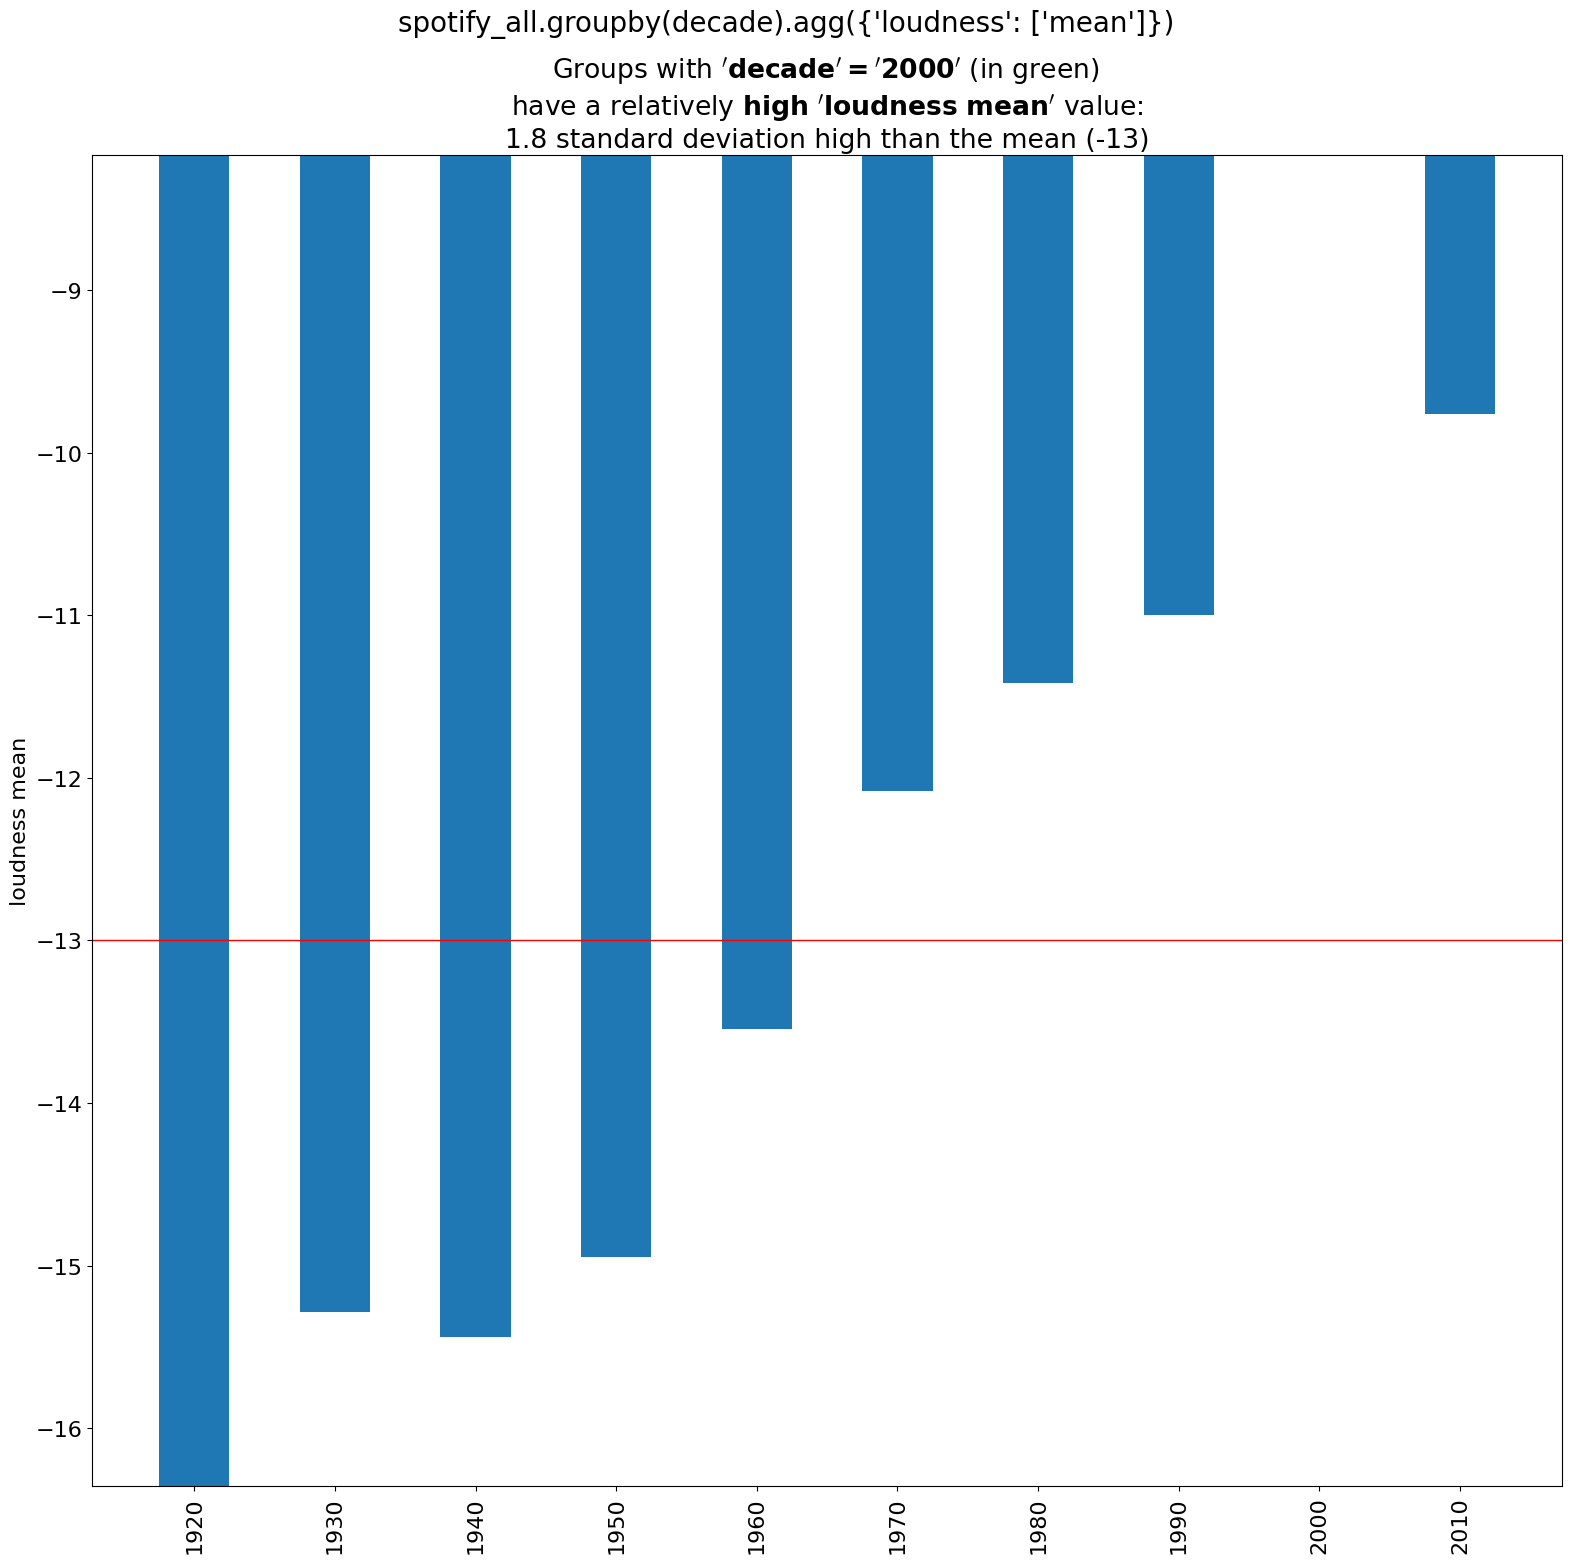

In [ ]:
all_mean_by_decade = spotify_all.groupby('decade').loudness.mean()
all_mean_by_decade.explain()

<Axes: xlabel='decade'>

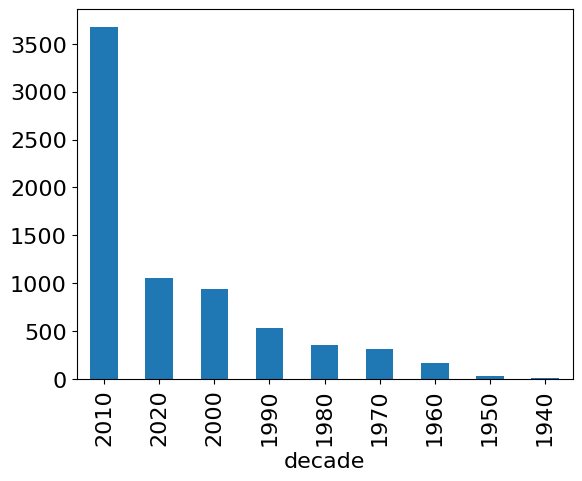

In [ ]:
popular['decade'].value_counts().plot(kind='bar')

## example 3

In [39]:
new = spotify_all[spotify_all.decade <= 1960]

In [41]:
mdbe = new.groupby(['decade']).popularity.mean()

<Axes: xlabel='decade'>

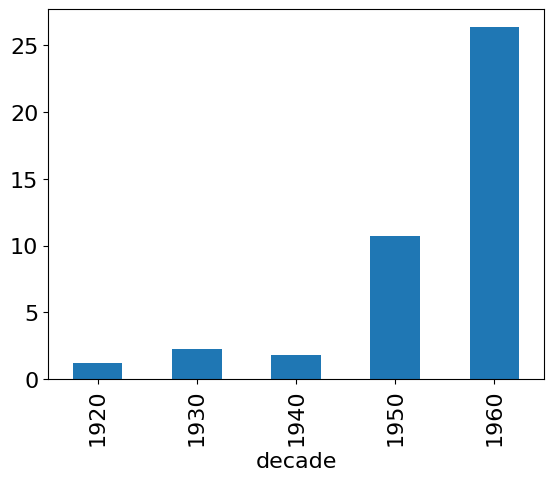

In [42]:
mdbe.plot(kind='bar')

In [43]:
new.danceability.describe()

count    71498.000000
mean         0.501849
std          0.170794
min          0.000000
25%          0.378000
50%          0.512000
75%          0.636000
max          0.974000
Name: danceability, dtype: float64

"The predicate ('explicit' = 0) has high influence on this outlier(0.051621904064692054)."

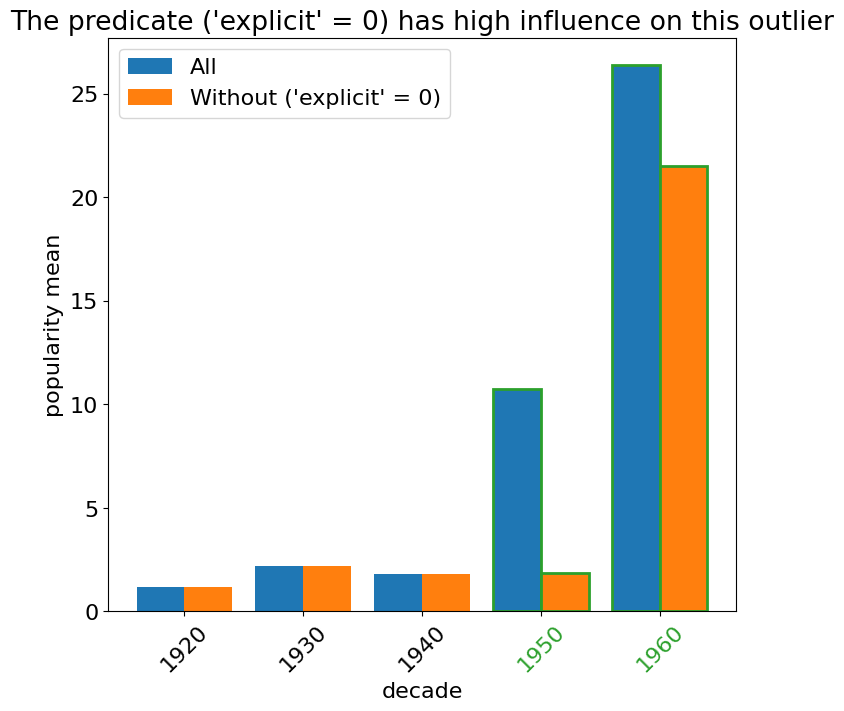

: 

In [45]:
mdbe.explain(explainer='outlier',target=[1950, 1960])

In [34]:
nonexplicit = spotify_all[spotify_all.explicit == 0]
nonexplicit.groupby(['decade']).popularity.mean()

decade
1920     1.364340
1930     2.333825
1940     1.941984
1950    10.792845
1960    26.391673
1970    34.554314
1980    37.009178
1990    42.966458
2000    42.060921
2010    25.108501
2020    13.703704
Name: popularity_mean, dtype: float64

In [35]:
explicit = spotify_all[spotify_all.explicit == 1]
explicit.groupby(['decade']).popularity.mean()

decade
1920     0.027855
1930     0.171667
1940     0.036585
1950     1.870968
1960    21.500000
1970    31.058824
1980    34.733766
1990    44.335661
2000    50.774286
2010    51.457480
2020    49.005263
Name: popularity_mean, dtype: float64